![satisfaction.png](satisfaction.png)

# <font color='black'>Projeto:</font> <font color='blue'>Prevendo o Nível de Satisfação dos Clientes do Santander.</font>

## <font color='black'>Data:</font> <font color='blue'>julho, 2020</font>

## <font color='black'>Cientista de Dados:</font> <font color='blue'>Walter Trevisan</font>

## 03- Explore The Data (`Step 01`)

Nesta etapa, vamos iniciar a nossa **`Análise Exploratória`** dos dados, utilizando o dataset de treinamento que foi preparado na etapa anterior, ou seja, o *data frame* que foi salvo no arquivo **`santander_train.pickle`**.

Então, vamos realizar as seguintes atividades:

1. Carregar o *data frame* de treinamento, salvo no arquivo **`santander_train.pickle`**;


2. Estudar cada atributo/feature e suas características (entender as informações e os tipos de dados), verificando também possíveis valores ausentes (**`Missing Values = NaN`**) e possíveis **`Outliers`**.


3. Salvar informações (objetos) importantes criados e/ou alterados durante a nossa análise exploratória.

## Setup

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Common imports:
import numpy as np    # NumPy
import pandas as pd   # Pandas
import pickle # Para salvar/carregar objetos.

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Importa o pacote "seaborn"
import seaborn as sns

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
PROJECT_ROOT_DIR = "."

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) desta Fase do Projeto:
PROJECT_IMG_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", "03-Explore_The_Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_IMG_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
PROJECT_OBJ_PATH = os.path.join(PROJECT_ROOT_DIR, "Objects")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "Objetos" (Data Frames) do Projeto:
PROJECT_DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_DATA_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
PROJECT_LIB_PATH = os.path.join(PROJECT_ROOT_DIR, "Library")

# Adicionando o diretório ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(PROJECT_LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Library_v1_0":
import DataScience_Library_v1_0 as dslib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Plot_Library_v1_0":
import DataScience_Plot_Library_v1_0 as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "DSA_Project_03_Library":
import DSA_Project_03_Library as pjlib

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
%reload_ext watermark
%watermark -a "Walter Trevisan" --iversions

pandas     0.25.3
matplotlib 3.2.1
numpy      1.18.2
seaborn    0.10.0
Walter Trevisan


## 01- Carregando o nosso *data frame* de treinamento: `santander_train.pickle`

In [3]:
# Carregando o objeto (data frame) "santander_train":
train_df = dslib.pickle_object_load(path=PROJECT_DATA_PATH, file="santander_train.pickle",
                                    msg="The 'santander_train' (data frame) has been successfully uploaded!")

The 'santander_train' (data frame) has been successfully uploaded!


In [4]:
# Resumo dos dados:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Columns: 371 entries, ID to Satisfaction
dtypes: float64(111), int64(260)
memory usage: 172.1 MB


**Análise:** O nosso dataset de treinamento (santander) possui um total de **60816** observações, com **370** atributos (variáveis preditoras) e a nossa variável target (Satisfaction). Temos **`260`** atributos do tipo **`int64`** e **`111`** atributos do tipo **`float64`**.

## 02- Entendendo as informações e os tipos de dados de cada atributo (`Feature`):

Visualizando os primeiros registros do nosso dataset:

In [5]:
# Dataframe "train_df":
train_df.head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,Satisfaction
0,111813,2,22,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
1,31053,2,79,105.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68480.010000,0
2,136647,2,29,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57517.740000,0
3,100343,2,29,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60060.930000,0
4,9720,2,25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84028.740000,0
5,38504,2,27,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40593.720000,0
6,133746,2,43,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77521.530000,0
7,34006,2,39,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46382.730000,0
8,78809,2,28,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74919.270000,0
9,62152,2,39,0.0,85.5,215.64,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
# Obtendo o label das variáveis preditoras (features):
features = train_df.columns

# Elimina as features (labels) "ID" e "Satisfaction" (Target).
# Em seguida classifica os labels em ordem crescente, transformando o resultado em uma lista:
features = list(features.drop(['ID', 'Satisfaction']).sort_values())
features

['delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_aport_var13_1y3',
 'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_reemb_var13_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_in_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_aport_var13_hace3',
 'imp_aport_var13_ult1',
 'imp_aport_var17_hace3',
 'imp_aport

**Análise:** Notamos a existência de um padrão de variáveis formado pela palavra **`var`** + **`número`**, por exemplo: **`var1`**, **`var16`**, **`var25`**, **`var33`**, **`var40`**, **`var44`**, etc.

Sendo assim, vamos verificar quantas variáveis temos neste padrão. Mas, primeiro, vamos renomear o label **`ind_var10cte_ult1`** para colocá-lo no mesmo padrão das outras variáveis.

In [7]:
# Renomeando o label "ind_var10cte_ult1", em nosso dataset, para colocá-lo no mesmo padrão das outras variáveis (features).
train_df.rename(columns={'ind_var10cte_ult1': 'ind_var10_cte_ult1'}, inplace=True)

# Obtendo novamente o label das variáveis preditoras (features):
features = train_df.columns

# Elimina as features (labels) "ID" e "Satisfaction" (Target).
# Em seguida classifica os labels em ordem crescente, transformando o resultado em uma lista:
features = list(features.drop(['ID', 'Satisfaction']).sort_values())
features

# Verificando se o label "ind_var10cte_ult1" foi renomeado com sucesso:
print("Label 'ind_var10_cte_ult1' renomeado com sucesso? --> {}".format("ind_var10_cte_ult1" in features))

Label 'ind_var10_cte_ult1' renomeado com sucesso? --> True


In [8]:
# Verificando os tipos e quantidades de variáveis existentes em nosso dataset:
print("Tipos de variáveis:")
print(pjlib.get_vars_type(features))
print("Quantidade: {0}".format(len(pjlib.get_vars_type(features))))

Tipos de variáveis:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
Quantidade: 45


**Análise:** temos, então, um total de **`45 variáveis`** numeradas de **`1 a 46`** porque o tipo de variável **`var23`** não existe em nosso dataset.

Agora, vamos criar um dicionário de dados agrupando as informações (**`features`**) para cada tipo de variável (**`var12`**, **`var27`**, **`var30`**, etc...).

In [9]:
# Obter as informações (features) relacionadas para os tipos de variáveis no padrão:
# "var" + "num": "var1", "var15", "var36", etc.
feat_groupby_vars = pjlib.get_features_groupby_vars(features)

# Exemplo: vamos verificar as features relacionadas a "var1":
print(feat_groupby_vars['var1'])

['ind_var1', 'ind_var1_0', 'num_var1', 'num_var1_0', 'saldo_var1']


In [10]:
# Verificando se todas as variáveis preditoras do dataset foram relacionadas no dicionário:
feat_qty = 0
for v in feat_groupby_vars.values():
    feat_qty += len(v)
    
print("Variáveis Preditoras: {0}".format(feat_qty))

Variáveis Preditoras: 369


**Análise:** portanto, temos **369 features** (variáveis preditoras), agrupadas em **45 tipos de variáveis**

**Estratégia:** faremos a nossa análise exploratória de cada **feature** analisando cada uma das **45 variáveis** definidas em nosso dataset. Entretanto, como cada variável possui uma quantidade diferente de features, vamos agrupá-las de acordo com a quantidade (contagem) de features para organizar a nossa análise e verificarmos possíveis padrões nas features do nosso dataset. 

In [11]:
# Vamos agrupar os tipos de variáveis do dataset, por quantidade (contagem) de features:
vars_groupby_featcount = pjlib.get_vars_groupby_featcount(features)
print("Tamanho do grupo: {}".format(len(vars_groupby_featcount.keys())))
print(list(vars_groupby_featcount.keys()))

Tamanho do grupo: 12
['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4', 'Feat_5', 'Feat_6', 'Feat_8', 'Feat_10', 'Feat_18', 'Feat_22', 'Feat_34', 'Feat_47']


In [12]:
# Verificando se todas as variáveis preditoras do dataset foram agrupadas no dicionário:
vars_qty = 0
for v in vars_groupby_featcount.values():
    vars_qty += len(v)
    
print("Tipos de Variáveis: {}".format(vars_qty))

Tipos de Variáveis: 45


**Análise:** portanto, temos **45 variáveis** distribuidas em **12 grupos** de tamanhos (contagens) de features.

Agora, vamos analizar as **`features`** de cada grupo de variáveis do nosso dataset, de acordo com a quantidade de features. Entretanto, primeiro, vamos criar uma instância do objeto `FeaturesInformations` para armazenar os nomes das features classificadas por tipo de informação, tais como:

1. Lista das features que são *Qualitativas Nominais* (**`Categorical`**);
2. Lista das features  que são *Qualitativas Nominais Binárias* (**`Binary`**);
3. Lista das features que são *Qualitativas Ordinais* (**`Ordinal`**);
4. Lista das features que são *Quantitativas Discretas* (**`Discrete`**);
5. Lista das features que são *Quantitativas Contínuas* (**`Continuous`**);
6. Lista das features que possuem valores extremos (**`Outliers`**);
7. Lista das features que possuem valores ausentes (**`NaN`**);
8. Lista das features que são *Irrelevantes* (**`Irrelevant`**).

In [13]:
# Criando o objeto da classe "FeaturesInformations" onde armazenaremos os nomes das features analisadas,
# classificando por tipo de informação:
info = ['Categorical', 'Binary', 'Ordinal', 'Discrete', 'Continuous', 'Outliers', 'NaN', 'Irrelevant']
santander_feat_info = dslib.FeaturesInformations(keys=info)

Builder called to create an object of class FeaturesInformations!
dict_keys(['Categorical', 'Binary', 'Ordinal', 'Discrete', 'Continuous', 'Outliers', 'NaN', 'Irrelevant'])


## Variáveis que possuem apenas `1 feature` em nosso dataset:

In [14]:
# Verificando as variáveis que possuem apenas "1" feature (variável preditora) no dataset:
feat_vars = vars_groupby_featcount['Feat_1']
print("Count of variables: {}".format(len(feat_vars)))
print(feat_vars)

Count of variables: 9
['var3', 'var4', 'var11', 'var15', 'var19', 'var21', 'var35', 'var36', 'var38']


In [15]:
# Conferindo a contagem de features para cada variável:
feat_total = 0
for v in feat_vars:
    feat_total += len(feat_groupby_vars[v])
    
print("Count of features: {}".format(feat_total))

Count of features: 9


## var3

In [16]:
# Resumo das informações:
train_df[feat_groupby_vars['var3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 1 columns):
var3    60816 non-null int64
dtypes: int64(1)
memory usage: 475.2 KB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise desta **`feature`** em nosso dataset:

In [17]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var3']].describe()

,var3
count,60816.000000
mean,-1526.496991
std,39075.501176
min,-999999.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,238.000000


In [18]:
# Vamos verificar a proporção dos valores para a feature relacionada a "var3":
dslib.percent_count_feature(df=train_df, feature=feat_groupby_vars['var3'][0], lines_drop=False)

,Total,Percent
var3,,
2,59339,0.9757
8,107,0.0018
-999999,93,0.0015
9,91,0.0015
3,89,0.0015
...,...,...
79,1,0.0000
81,1,0.0000
145,1,0.0000


In [19]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var3'], percent_range=range(95, 101, 1))
result

,var3
Percentile,
95%,2.0
96%,2.0
97%,2.0
98%,3.0
99%,11.0
100%,238.0


**Análise:** observando distribuição de valores para as **`features`** relacionadas com **`var3`**, sendo que neste caso temos apenas a feature **`var3`**, percebemos que esta feature é uma variável do tipo `Quantitativa Discreta`, e que **`97.57%`** dos valores são **constantes** e iguais a **`2`**, ou seja, entendemos que esta **feature é `irrelevante`**, ou seja, não será analisada na criação dos modelos preditivos.

In [20]:
# Armazenando informações sobre a feature:
santander_feat_info.save(key='Discrete', features=feat_groupby_vars['var3'])   # Quantitativa Discreta.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var3']) # Irrelevante.

## var4

In [21]:
# Resumo das informações:
train_df[feat_groupby_vars['var4']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 1 columns):
num_var4    60816 non-null int64
dtypes: int64(1)
memory usage: 475.2 KB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise desta **`feature`** em nosso dataset:

In [22]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var4']].describe()

,num_var4
count,60816.000000
mean,1.080620
std,0.911055
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,7.000000


Saving figure: plot_count_num_var4


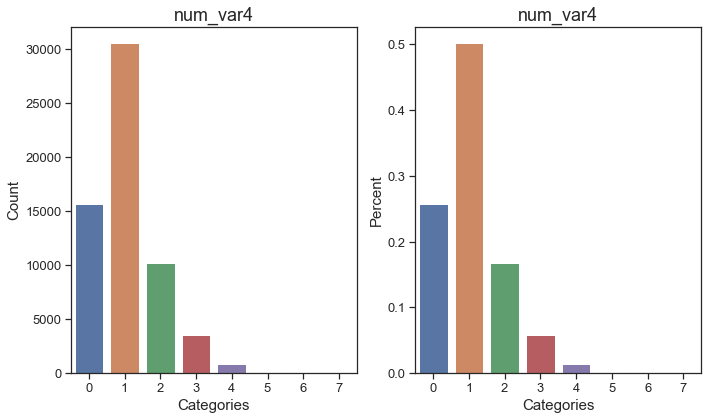

,num_var4,Total,Percent
0,0,15618,0.2568
1,1,30496,0.5014
2,2,10146,0.1668
3,3,3532,0.0581
4,4,825,0.0136
5,5,165,0.0027
6,6,28,0.0005
7,7,6,0.0001


In [23]:
# Agora, vamos plotar as contagens de observações e as proporções de cada classe da nossa feature:
ptlib.plot_percent_count_feature(df=train_df, feature=feat_groupby_vars['var4'][0], plot_style='ticks',
                                 title=feat_groupby_vars['var4'][0], title_fontsize=18, title_share=False,
                                 xlabel1="Categories", xlabel1_fontsize=15, xlabel2="Categories", xlabel2_fontsize=15,
                                 ylabel_fontsize=15, columns_nr=2, rows_nr=1, share_x=False, share_y=False,
                                 width=10, height=6, xtick_labelsize=13, ytick_labelsize=13, wspace=None, hspace=None,
                                 figure_id='plot_count_num_var4', figure_path=PROJECT_IMG_PATH,
                                 figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                )

**Análise:** podemos observar que a **`feature`** **`num_var4`**, relacionada com **`var4`**, é na verdade uma variável do tipo `Categórica Nominal` com **`8 categorias`**. Notamos também que **`92.50%`** das observações do nosso dataset de treinamento estão classificados nas categorias **`0, 1 e 2`**. Portanto, está **feature é `relevante` e deverá ser analisada** na criação dos modelos preditivos.

In [24]:
# Armazenando informações sobre a feature:
santander_feat_info.save(key='Categorical', features=feat_groupby_vars['var4']) # Qualitativa Nominal.

## var11

In [25]:
# Resumo das informações:
train_df[feat_groupby_vars['var11']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 1 columns):
num_trasp_var11_ult1    60816 non-null int64
dtypes: int64(1)
memory usage: 475.2 KB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise desta **`feature`** em nosso dataset:

In [26]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var11']].describe()

,num_trasp_var11_ult1
count,60816.000000
mean,0.119771
std,1.193239
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,93.000000


In [27]:
# Vamos verificar a proporção dos valores para a feature relacionada a "var11":
dslib.percent_count_feature(df=train_df, feature=feat_groupby_vars['var11'][0], lines_drop=False)

,Total,Percent
num_trasp_var11_ult1,,
0,59509,0.9785
3,834,0.0137
6,247,0.0041
9,113,0.0019
12,40,0.0007
15,22,0.0004
18,11,0.0002
24,8,0.0001
30,7,0.0001


In [28]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var11'], percent_range=range(95, 101, 1))
result

,num_trasp_var11_ult1
Percentile,
95%,0.0
96%,0.0
97%,0.0
98%,3.0
99%,3.0
100%,93.0


**Análise:** observando a distribuição de valores para a **`feature`** relacionada com **`var11`**, sendo que neste caso temos apenas a feature **`num_trasp_var11_ult1`**, percebemos que **`97.85%`** dos valores são **constantes** e iguais a **`0`**, podendo ser um indicativo de valores ausentes (**NaN**). Trata-se de uma variável do tipo `Quantitativa Discreta`. Neste caso, entendemos que esta **feature é `irrelevante`**, ou seja, não será analizada na criação dos modelos preditivos.

In [29]:
# Armazenando informações sobre a feature:
santander_feat_info.save(key='Discrete', features=feat_groupby_vars['var11'])   # Quantitativa Discreta.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var11']) # Irrelevante.

## var15

In [30]:
# Resumo das informações:
train_df[feat_groupby_vars['var15']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 1 columns):
var15    60816 non-null int64
dtypes: int64(1)
memory usage: 475.2 KB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise desta **`feature`** em nosso dataset:

In [31]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var15']].describe()

,var15
count,60816.000000
mean,33.218742
std,12.947363
min,5.000000
25%,23.000000
50%,28.000000
75%,40.000000
max,105.000000


In [32]:
# Vamos verificar a proporção dos valores para a feature relacionada a "var15":
dslib.percent_count_feature(df=train_df, feature=feat_groupby_vars['var15'][0], lines_drop=False)

,Total,Percent
var15,,
23,16118,0.2650
24,4961,0.0816
25,3342,0.0550
26,2666,0.0438
27,2309,0.0380
...,...,...
97,2,0.0000
104,2,0.0000
98,1,0.0000


**Análise:** entendemos que **`var15`** é uma variável do tipo `Quantitativa Discreta` com valores em uma faixa de **`5 a 105`**. Vamos analisar a sua distribuição de frequências (*Histograma*) e também verificar se existem **outliers** com um *BoxPlot*.

Saving figure: plot_hist_boxplot_var15


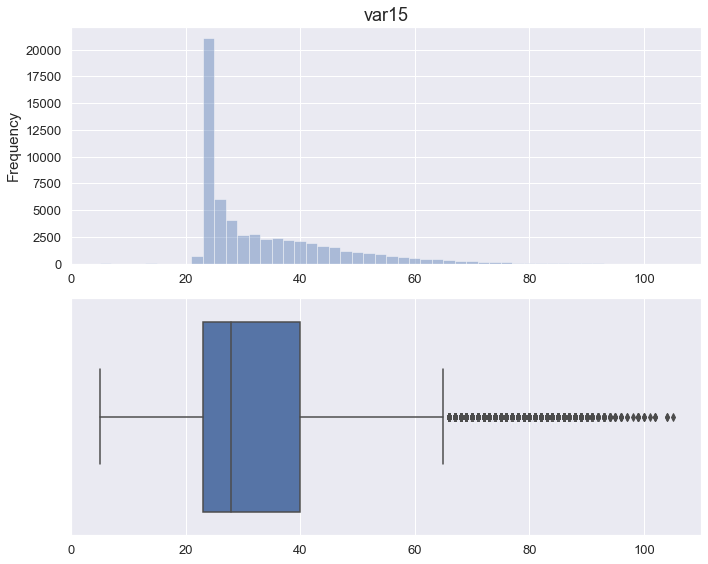

In [33]:
# Plots: Histrograma e BoxPlot
ptlib.plot_hist_boxplot_feature(df=train_df, feature=feat_groupby_vars['var15'][0], kde=False, orient_boxplot='h',
                                plot_style="darkgrid", cols_nr=1, rows_nr=2,
                                titles=[feat_groupby_vars['var15'][0], None],titles_fontsize=18,
                                ylabels=['Frequency', None], ylabels_fontsize=15, colors='b', saturation_boxplot=0.80,
                                xtick_labelsize=13, ytick_labelsize=13, width=10, height=8, wspace=None, hspace=None,
                                figure_id="plot_hist_boxplot_var15", figure_path=PROJECT_IMG_PATH,
                                figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                               )

**Análise:** a sua distribuição de frequência está concentrada entre os valores **`23 a 40`**. No *histograma* podemos observar um pico de frequências (**`26.50%` no valor 23**). Os valores da **média** e da **mediana** estão próximos (**`33`** e **`28`** respectivamente), ou seja, existe uma pequena variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores acima de `~65`**.

Portanto, entendemos esta **feature é `relevante` e deverá ser analisada** na criação dos modelos preditivos.

In [34]:
# Armazenando informações sobre a feature:
santander_feat_info.save(key='Discrete', features=feat_groupby_vars['var15']) # Quantitativa Discreta.
santander_feat_info.save(key='Outliers', features=feat_groupby_vars['var15']) # Variável têm "Outliers".

## var19

In [35]:
# Resumo das informações:
train_df[feat_groupby_vars['var19']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 1 columns):
ind_var19    60816 non-null int64
dtypes: int64(1)
memory usage: 475.2 KB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise desta **`feature`** em nosso dataset:

In [36]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var19']].describe()

,ind_var19
count,60816.000000
mean,0.004325
std,0.065619
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [37]:
# Vamos verificar a proporção dos valores para a feature relacionada a "var19":
dslib.percent_count_feature(df=train_df, feature=feat_groupby_vars['var19'][0], lines_drop=False)

,Total,Percent
ind_var19,,
0,60553,0.9957
1,263,0.0043


**Análise:** observando a proporção de valores para a **`feature`** relacionada com **`var19`**, sendo que neste caso temos apenas a feature **`ind_var19`**, percebemos que **`99.57%`** dos valores são **constantes** e iguais a **`0`**. Trata-se de uma variável do tipo `Categórica Nominal Binária`, ou seja, com apenas duas classes (**`0` e `1`**). Neste caso, entendemos que esta **feature é `irrelevante`** para ser analisada na criação dos modelos preditivos.

In [38]:
# Armazenando informações sobre a feature:
santander_feat_info.save(key='Binary', features=feat_groupby_vars['var19'])     # Categórica Nominal Binária.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var19']) # Irrelevante.

## var21

In [39]:
# Resumo das informações:
train_df[feat_groupby_vars['var21']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 1 columns):
var21    60816 non-null int64
dtypes: int64(1)
memory usage: 475.2 KB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise desta **`feature`** em nosso dataset:

In [40]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var21']].describe()

,var21
count,60816.000000
mean,31.871547
std,393.703492
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,30000.000000


In [41]:
# Vamos verificar a proporção dos valores para a feature relacionada a "var21":
dslib.percent_count_feature(df=train_df, feature=feat_groupby_vars['var21'][0], lines_drop=False)

,Total,Percent
var21,,
0,60142,0.9889
900,178,0.0029
1800,157,0.0026
4500,77,0.0013
3000,68,0.0011
7200,47,0.0008
3600,44,0.0007
1500,24,0.0004
2700,23,0.0004


**Análise:** observando a distribuição de valores para a **`feature`** relacionada com a **`var21`**, sendo que neste caso temos apenas a feature **`var21`**, percebemos que **`98.89%`** dos valores são **constantes** e iguais a **`0`**, podendo ser um indicativo de valores ausentes (**NaN**). Trata-se de uma variável do tipo `Quantitativa Discreta`. Neste caso, entendemos que esta **feature é `irrelevante`** para ser analisada na criação dos modelos preditivos.

In [42]:
# Armazenando informações sobre a feature:
santander_feat_info.save(key='Discrete', features=feat_groupby_vars['var21'])   # Quantitativa Discreta.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var21']) # Irrelevante.

## var35

In [43]:
# Resumo das informações:
train_df[feat_groupby_vars['var35']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 1 columns):
num_var35    60816 non-null int64
dtypes: int64(1)
memory usage: 475.2 KB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise desta **`feature`** em nosso dataset:

In [44]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var35']].describe()

,num_var35
count,60816.000000
mean,3.302733
std,2.871679
min,0.000000
25%,0.000000
50%,3.000000
75%,3.000000
max,36.000000


In [45]:
# Obtendo os percentis a partir de "76%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var35'], percent_range=range(76, 101, 1))
result

,num_var35
Percentile,
76%,6.0
77%,6.0
78%,6.0
79%,6.0
80%,6.0
81%,6.0
82%,6.0
83%,6.0
84%,6.0


In [46]:
# Vamos verificar a proporção dos valores para a feature relacionada a "var35":
dslib.percent_count_feature(df=train_df, feature=feat_groupby_vars['var35'][0], lines_drop=False)

,Total,Percent
num_var35,,
3,30313,0.4984
0,15618,0.2568
6,9853,0.1620
9,3695,0.0608
12,988,0.0162
15,254,0.0042
18,68,0.0011
21,15,0.0002
24,5,0.0001


**Análise:** entendemos que a feature **`num_var35`** é uma variável do tipo `Quantitativa Discreta` com valores em uma faixa de **`0 a 36`**. Vamos analisar a sua distribuição de frequências (*Histograma*) e também verificar se existem **outliers** com um *BoxPlot*.

Saving figure: plot_hist_boxplot_num_var35


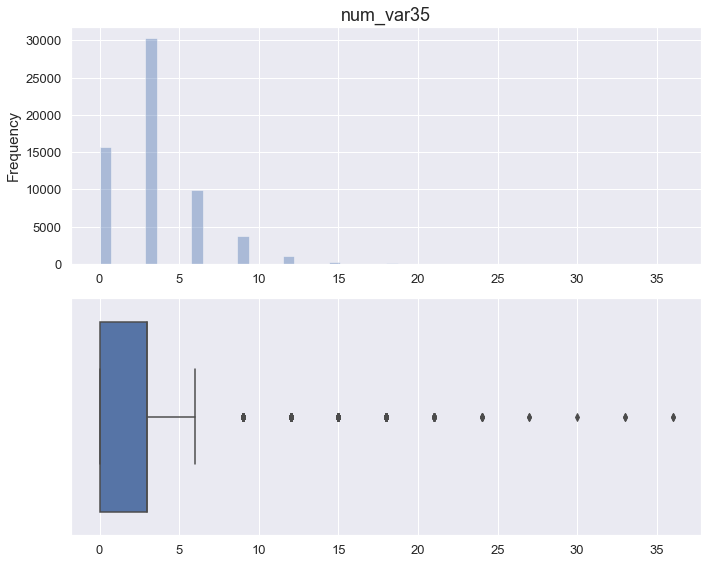

In [47]:
# Plots: Histrograma e BoxPlot
ptlib.plot_hist_boxplot_feature(df=train_df, feature=feat_groupby_vars['var35'][0], bins=None, kde=False,
                                orient_boxplot='h', plot_style="darkgrid", cols_nr=1, rows_nr=2,
                                titles=[feat_groupby_vars['var35'][0], None],titles_fontsize=18,
                                ylabels=['Frequency', None], ylabels_fontsize=15, colors='b', saturation_boxplot=0.80,
                                xtick_labelsize=13, ytick_labelsize=13, width=10, height=8, wspace=None, hspace=None,
                                figure_id="plot_hist_boxplot_num_var35", figure_path=PROJECT_IMG_PATH,
                                figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                               )

**Análise:** a sua distribuição de frequência está concentrada entre os valores **`0 a 36`**. No *histograma* podemos observar um pico de frequência (**`49.84%`**) no valor **`3`**. Embora os valores da **média** e da **mediana** estejam próximos (**`3.3`** e **`3.0`** respectivamente), existe uma pequena variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores acima de `8`**.

Portanto, entendemos esta **feature é `relevante` e deverá ser analisada** na criação dos modelos preditivos.

In [48]:
# Armazenando informações sobre a feature:
santander_feat_info.save(key='Discrete', features=feat_groupby_vars['var35']) # Quantitativa Discreta.
santander_feat_info.save(key='Outliers', features=feat_groupby_vars['var35']) # Variável têm "Outliers".

## var36

In [49]:
# Resumo das informações:
train_df[feat_groupby_vars['var36']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 1 columns):
var36    60816 non-null int64
dtypes: int64(1)
memory usage: 475.2 KB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise desta **`feature`** em nosso dataset:

In [50]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var36']].describe()

,var36
count,60816.000000
mean,40.507054
std,47.375790
min,0.000000
25%,2.000000
50%,3.000000
75%,99.000000
max,99.000000


Saving figure: plot_count_num_var36


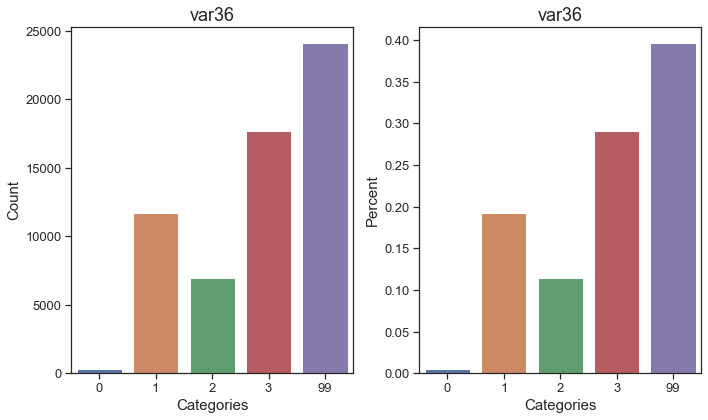

,var36,Total,Percent
0,0,327,0.0054
1,1,11728,0.1928
2,2,6982,0.1148
3,3,17691,0.2909
4,99,24088,0.3961


In [51]:
# Agora, vamos plotar as contagens de observações e as proporções de cada classe da nossa feature:
ptlib.plot_percent_count_feature(df=train_df, feature=feat_groupby_vars['var36'][0], plot_style='ticks',
                                 title=feat_groupby_vars['var36'][0], title_fontsize=18, title_share=False,
                                 xlabel1="Categories", xlabel1_fontsize=15, xlabel2="Categories", xlabel2_fontsize=15,
                                 ylabel_fontsize=15, columns_nr=2, rows_nr=1, share_x=False, share_y=False,
                                 width=10, height=6, xtick_labelsize=13, ytick_labelsize=13, wspace=None, hspace=None,
                                 figure_id='plot_count_num_var36', figure_path=PROJECT_IMG_PATH,
                                 figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                                )

**Análise:** entendemos que a feature **`var36`** é na verdade uma variável do tipo `Categórica Nominal` com **`5 categorias`**. Notamos também que **`39.61%`** das observações do nosso dataset de treinamento estão classificados na categoria **`99`**. Portanto, está **feature é `relevante` e deverá ser analisada** na criação dos modelos preditivos.

In [52]:
# Armazenando informações sobre a feature:
santander_feat_info.save(key='Categorical', features=feat_groupby_vars['var36']) # Qualitativa Nominal.

## var38

In [53]:
# Resumo das informações:
train_df[feat_groupby_vars['var38']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 1 columns):
var38    60816 non-null float64
dtypes: float64(1)
memory usage: 475.2 KB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise desta **`feature`** em nosso dataset:

In [54]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var38']].describe()

,var38
count,6.081600e+04
mean,1.176408e+05
std,1.895319e+05
min,5.163750e+03
25%,6.777529e+04
50%,1.065147e+05
75%,1.187928e+05
max,2.203474e+07


In [55]:
# Obtendo os percentis a partir de "80%", com intervá-los de "5%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var38'], percent_range=range(80, 105, 5))
result

,var38
Percentile,
80%,1.328978e+05
85%,1.527081e+05
90%,1.827535e+05
95%,2.433100e+05
100%,2.203474e+07


In [56]:
print(list(result.values))

[array([132897.75]), array([152708.1225]), array([182753.49]), array([243309.9675]), array([22034738.76])]


In [57]:
# Vamos verificar a proporção dos valores para a feature relacionada a "var38":
dslib.percent_count_feature(df=train_df, feature=feat_groupby_vars['var38'][0], lines_drop=False)

,Total,Percent
var38,,
1.173110e+05,11886,0.1954
4.519312e+05,14,0.0002
4.636252e+05,10,0.0002
1.045638e+05,8,0.0001
2.889974e+05,7,0.0001
...,...,...
7.031862e+04,1,0.0000
7.031913e+04,1,0.0000
7.031937e+04,1,0.0000


**Análise:** entendemos que a feature **`var38`** é uma variável do tipo `Quantitativa Contínua`. Vamos analisar a sua distribuição de frequências (*Histograma*) e também verificar se existem **outliers** com um *BoxPlot*.

Saving figure: plot_hist_boxplot_num_var38


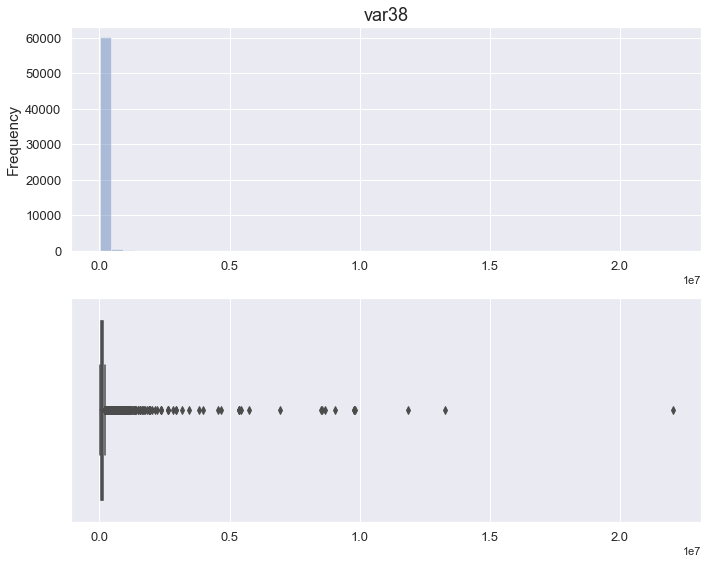

In [58]:
# Plots: Histrograma e BoxPlot
ptlib.plot_hist_boxplot_feature(df=train_df, feature=feat_groupby_vars['var38'][0], bins=None, kde=False,
                                orient_boxplot='h', plot_style="darkgrid", cols_nr=1, rows_nr=2,
                                titles=[feat_groupby_vars['var38'][0], None],titles_fontsize=18,
                                ylabels=['Frequency', None], ylabels_fontsize=15, colors='b', saturation_boxplot=0.80,
                                xtick_labelsize=13, ytick_labelsize=13, width=10, height=8, wspace=None, hspace=None,
                                figure_id="plot_hist_boxplot_num_var38", figure_path=PROJECT_IMG_PATH,
                                figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                               )

**Análise:** trata-se de uma variável do tipo `Quantitativa Contínua`. Observamos que existe uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores acima de `500 mil`**.Também podemos observar que a sua distribuição de frequência está concentrada em um faixa de valores entre **`500` e `200 mil`**, conforme podemos observar no *histograma*.

Portanto, entendemos que esta **feature é `relevante` e deverá ser analisada** na criação dos modelos preditivos.

In [59]:
# Armazenando informações sobre a feature:
santander_feat_info.save(key='Continuous', features=feat_groupby_vars['var38']) # Quantitativa Contínua.
santander_feat_info.save(key='Outliers', features=feat_groupby_vars['var38'])   # Variável têm "Outliers".

In [60]:
# Verificando a contagem de features analisadas até aqui:
print("Counting of analyzed features: {}".format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                 'Discrete', 'Continuous'])))

Counting of analyzed features: 9


## Variáveis que possuem `2 features` em nosso dataset:

In [61]:
# Verificando as variáveis que possuem "2" features (variáveis preditoras) no dataset:
feat_vars = vars_groupby_featcount['Feat_2']
print("Count of variables: {}".format(len(feat_vars)))
print(feat_vars)

Count of variables: 2
['var9', 'var10']


In [62]:
# Conferindo a contagem de features para cada variável:
feat_total = 0
for v in feat_vars:
    feat_total += len(feat_groupby_vars[v])
    
print("Count of features: {}".format(feat_total))

Count of features: 4


## var9

In [63]:
# Resumo das informações:
train_df[feat_groupby_vars['var9']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 2 columns):
ind_var9_cte_ult1    60816 non-null int64
ind_var9_ult1        60816 non-null int64
dtypes: int64(2)
memory usage: 950.4 KB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [64]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var9']].describe()

,ind_var9_cte_ult1,ind_var9_ult1
count,60816.000000,60816.000000
mean,0.097047,0.085915
std,0.296024,0.280241
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [65]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var9":
for feat in feat_groupby_vars['var9']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                   Total  Percent
ind_var9_cte_ult1                
0                  54914    0.903
1                   5902    0.097

               Total  Percent
ind_var9_ult1                
0              55591   0.9141
1               5225   0.0859



**Análise:** notamos que todas as **`features`** relacionadas com **`var9`** são variáveis do tipo `Categóricas Nominais Binárias` (**`ind_var9_cte_ult1`** e **`ind_var9_ult1`**), ou seja, com apenas duas categorias (**`0` e `1`**).

Observamos que as features **`ind_var9_cte_ult1`** e **`ind_var9_ult1`**) possuem **`90.30%`** e **`91.41%`** das observações, respectivamente, classificadas na categoria **`0`**.

Agora, vamos verificar se existe alguma **correlação** entre as **`features`** de **`var9`**:

In [66]:
# Analisando a correlação entre as features de "var9":
train_df[feat_groupby_vars['var9']].corr()

,ind_var9_cte_ult1,ind_var9_ult1
ind_var9_cte_ult1,1.000000,0.935153
ind_var9_ult1,0.935153,1.000000


**Análise:** observando a **correlação entre as features**, concluímos que **existe uma alta correlação positiva** entre as variáveis.

Portanto, entendemos que estas **features são `irrelevantes`**, ou seja, não serão analisadas na criação dos modelos preditivos.

In [67]:
# Armazenando informações sobre a feature:
santander_feat_info.save(key='Binary', features=feat_groupby_vars['var9'])     # Categórica Nominal Binária.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var9']) # Irrelevantes.

## var10

In [68]:
# Resumo das informações:
train_df[feat_groupby_vars['var10']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 2 columns):
ind_var10_cte_ult1    60816 non-null int64
ind_var10_ult1        60816 non-null int64
dtypes: int64(2)
memory usage: 950.4 KB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [69]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var10']].describe()

,ind_var10_cte_ult1,ind_var10_ult1
count,60816.000000,60816.000000
mean,0.092443,0.080982
std,0.289652,0.272810
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [70]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var10":
for feat in feat_groupby_vars['var10']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                    Total  Percent
ind_var10_cte_ult1                
0                   55194   0.9076
1                    5622   0.0924

                Total  Percent
ind_var10_ult1                
0               55891    0.919
1                4925    0.081



**Análise:** notamos que todas as **`features`** relacionadas com **`var10`** são variáveis do tipo `Categóricas Nominais Binárias` (**`ind_var10_cte_ult1`** e **`ind_var10_ult1`**), ou seja, com apenas duas categorias (**`0` e `1`**).

Observamos que as features **`ind_var10_cte_ult1`** e **`ind_var10_ult1`**) possuem **`90.76%`** e **`91.90%`** das observações, respectivamente, classificadas na categoria **`0`**.

Agora, vamos verificar se existe alguma **correlação** entre as **`features`** de **`var10`**:

In [71]:
# Analisando a correlação entre as features de "var10":
train_df[feat_groupby_vars['var10']].corr()

,ind_var10_cte_ult1,ind_var10_ult1
ind_var10_cte_ult1,1.000000,0.930107
ind_var10_ult1,0.930107,1.000000


**Análise:** observando a **correlação entre as features**, concluímos que **existe uma alta correlação positiva** entre as variáveis.

Portanto, entendemos que estas **features são `irrelevantes`**, ou seja, não serão analisadas na criação dos modelos preditivos.

In [72]:
# Armazenando informações sobre a feature:
santander_feat_info.save(key='Binary', features=feat_groupby_vars['var10'])     # Categórica Nominal Binária.
santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var10']) # Irrelevantes.

In [73]:
# Verificando a contagem de features analisadas até aqui:
print("Counting of analyzed features: {}".format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                 'Discrete', 'Continuous'])))

Counting of analyzed features: 13


## Variáveis que possuem `3 features` em nosso dataset:

In [74]:
# Verificando as variáveis que possuem "3" features (variáveis preditoras) no dataset:
feat_vars = vars_groupby_featcount['Feat_3']
print("Count of variables: {}".format(len(feat_vars)))
print(feat_vars)

Count of variables: 1
['var42']


In [75]:
# Conferindo a contagem de features para cada variável:
feat_total = 0
for v in feat_vars:
    feat_total += len(feat_groupby_vars[v])
    
print("Count of features: {}".format(feat_total))

Count of features: 3


## var42

In [76]:
# Resumo das informações:
train_df[feat_groupby_vars['var42']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 3 columns):
num_var42      60816 non-null int64
num_var42_0    60816 non-null int64
saldo_var42    60816 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [77]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var42']].describe()

,num_var42,num_var42_0,saldo_var42
count,60816.000000,60816.000000,6.081600e+04
mean,2.219219,3.206590,7.316827e+03
std,1.499252,0.966158,5.069721e+04
min,0.000000,0.000000,-4.942260e+03
25%,0.000000,3.000000,0.000000e+00
50%,3.000000,3.000000,3.000000e+00
75%,3.000000,3.000000,1.200000e+02
max,18.000000,114.000000,3.008077e+06


In [78]:
# Obtendo os percentis a partir de "75%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var42'], percent_range=range(75, 101, 1))
result

,num_var42,num_var42_0,saldo_var42
Percentile,,,
75%,3.0,3.0,1.200000e+02
76%,3.0,3.0,1.500000e+02
77%,3.0,3.0,1.530000e+02
78%,3.0,3.0,2.017320e+02
79%,3.0,3.0,2.700000e+02
80%,3.0,3.0,3.030000e+02
81%,3.0,3.0,3.913245e+02
82%,3.0,3.0,4.917240e+02
83%,3.0,3.0,6.030000e+02


In [79]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var42":
for feat in feat_groupby_vars['var42']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
num_var42                
3          41640   0.6847
0          17520   0.2881
6           1628   0.0268
9             23   0.0004
12             3   0.0000
15             1   0.0000
18             1   0.0000

             Total  Percent
num_var42_0                
3            56175   0.9237
6             4135   0.0680
0              336   0.0055
9              159   0.0026
12               7   0.0001
15               2   0.0000
18               1   0.0000
114              1   0.0000

             Total  Percent
saldo_var42                
0.00         17419   0.2864
3.00         14828   0.2438
90.00         4231   0.0696
30.00         1383   0.0227
15.00         1291   0.0212
...            ...      ...
851.88           1   0.0000
852.33           1   0.0000
852.60           1   0.0000
852.81           1   0.0000
3008077.32       1   0.0000

[12946 rows x 2 columns]



**Análise:** observamos que as **`features`** **`num_var42`** e **`num_var42_0`**, relacionadas com **`var42`**, são variáveis do tipo `Quantitativas Discretas`. A feature **`saldo_var42`** é uma variável do tipo `Quantitativa Contínua`.

Agora, vamos analisar, para as features **`num_var42`**, **`num_var42_0`** e **`saldo_var42`**, as suas distribuições de frequências (*Histograma*) e também verificar se existem **outliers** com um *BoxPlot*.

Saving figure: plot_histograms_var42


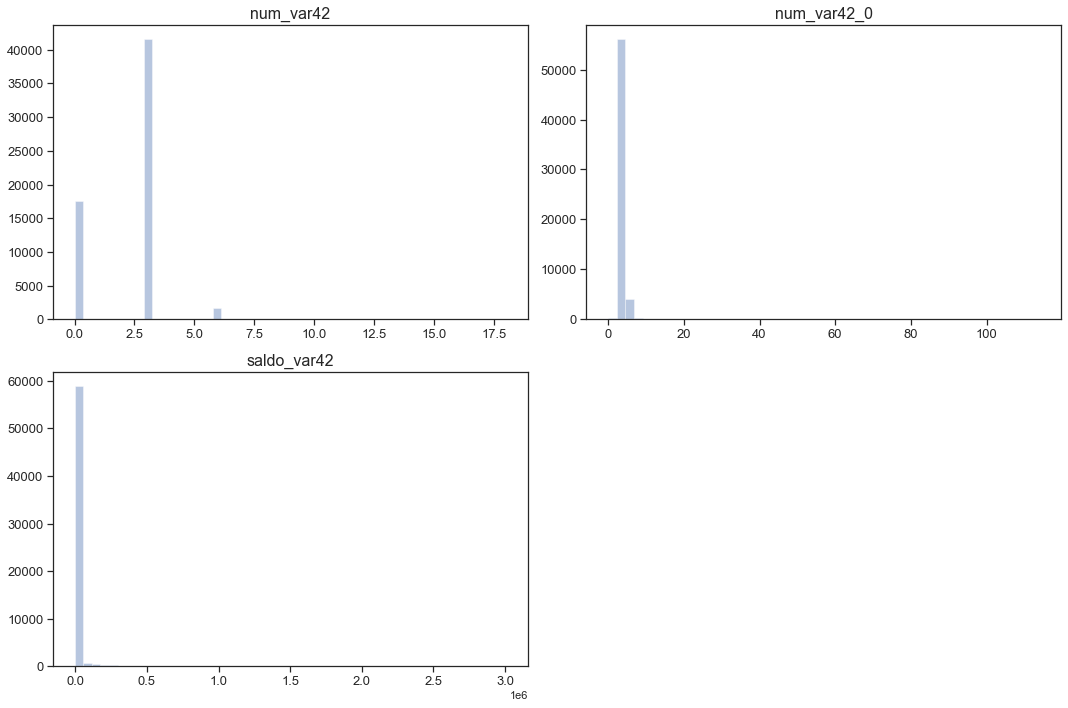

In [80]:
# Desenhando os histogramas para as features 'num_var42', 'num_var42_0' e 'saldo_var42' de "var42":
# Selecionando as features:
feats = ['num_var42', 'num_var42_0', 'saldo_var42']

# Histogramas:
ptlib.plot_histograms_features(df=train_df, features=feats, plot_style='ticks', kde=False, colors='b',
                               titles=feats, titles_fontsize=16, xlabels=None, xlabels_fontsize=13,
                               ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13,
                               cols_nr=2, rows_nr=2, width=15, height=10, wspace=None, hspace=None,
                               figure_id="plot_histograms_var42", figure_path=PROJECT_IMG_PATH,
                               figure_file_format="png", figure_file_extension=".png",
                               tight_layout=True, dpi=300
                              )

Saving figure: plot_boxplots_var42


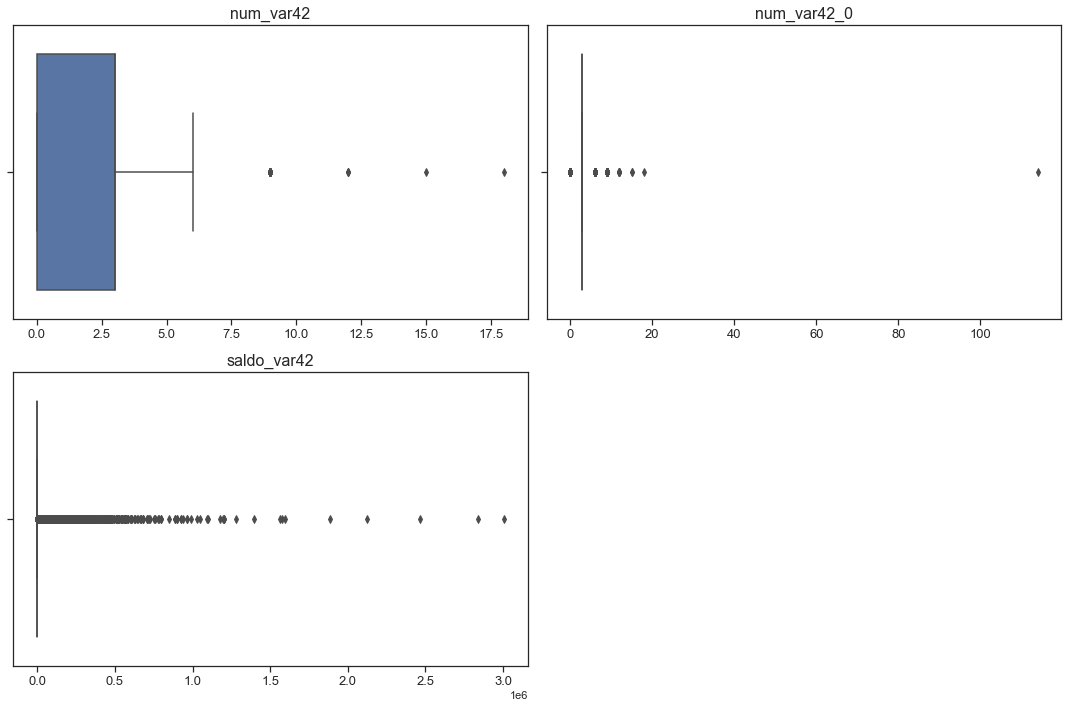

In [81]:
# Desenhando os boxplots para as features 'num_var42', 'num_var42_0' e 'saldo_var42' de "var42":
# Selecionando as features:
feats = ['num_var42', 'num_var42_0', 'saldo_var42']

# BoxPlots:
ptlib.plot_boxplots_features(df=train_df, features=feats, plot_style='ticks', colors='b',
                             orient='h', saturation=0.75,
                             titles=feats, titles_fontsize=16, xlabels=None, xlabels_fontsize=13,
                             ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13,
                             cols_nr=2, rows_nr=2, width=15, height=10, wspace=None, hspace=None,
                             figure_id="plot_boxplots_var42", figure_path=PROJECT_IMG_PATH,
                             figure_file_format="png", figure_file_extension=".png",
                             tight_layout=True, dpi=300
                            )

Agora, vamos verificar se existe alguma **correlação** entre as **`features`** de **`var42`**:

In [82]:
# Analisando a correlação entre as features de "var42":
train_df[feat_groupby_vars['var42']].corr()

,num_var42,num_var42_0,saldo_var42
num_var42,1.000000,0.277788,0.201912
num_var42_0,0.277788,1.000000,0.377832
saldo_var42,0.201912,0.377832,1.000000


**Análise:**

1. Entendemos que **existe uma pequena correlação positiva** entre as variáveis.

2. Na feature `num_var42`,  observamos que existe uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores acima de `9`**. No histograma, podemos notar que existe um *pico* de observações (**`68.47%`**) com valores iguais a `3`. Também podemos observar que **`97.28%`** da sua distribuição de frequência está concentrada em um faixa de valores entre **`0` e `3`**, conforme podemos observar no *histograma* e no relatório de *percentis*. Portanto, entendemos que esta **feature é `relevante` e deverá ser analisada** na criação dos modelos preditivos;

3. Na feature `num_var42_0`,  observamos que existe uma pequena variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores iguais a `0` e acima de `6`**. No histograma, podemos notar que existe um *pico* de observações (**`92.37%`**) com valores iguais a `3`. Também podemos observar que `97%` da sua distribuição de frequência está concentrada em um faixa de valores entre **`0` e `6`**, conforme podemos observar no *histograma* e no relatório de *percentis*. Portanto, entendemos que esta **feature é `irrelevante`**, ou seja, não será analisada na criação dos modelos preditivos;

4. Na feature `saldo_var42`,  observamos que existe uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores acima de `90 mil`**.Também podemos observar que `94%` da sua distribuição de frequência está concentrada em um faixa de valores entre **`0` e `8,500`**, conforme podemos observar no *histograma* e no relatório de *percentis*. Portanto, entendemos que esta **feature é `relevante` e deverá ser analisada** na criação dos modelos preditivos.

In [83]:
# Armazenando informações sobre as features:
features = ['num_var42', 'num_var42_0']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['saldo_var42']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Outliers', features=['num_var42', 'saldo_var42']) # Variáveis têm "Outliers".
santander_feat_info.save(key='Irrelevant', features=['num_var42_0'])            # Irrelevante.

In [84]:
# Verificando a contagem de features analisadas até aqui:
print("Counting of analyzed features: {}".format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                 'Discrete', 'Continuous'])))

Counting of analyzed features: 16


## Variáveis que possuem `4 features` em nosso dataset:

In [85]:
# Verificando as variáveis que possuem "4" features (variáveis preditoras) no dataset:
feat_vars = vars_groupby_featcount['Feat_4']
print("Count of variables: {}".format(len(feat_vars)))
print(feat_vars)

Count of variables: 1
['var16']


In [86]:
# Conferindo a contagem de features para cada variável:
feat_total = 0
for v in feat_vars:
    feat_total += len(feat_groupby_vars[v])
    
print("Count of features: {}".format(feat_total))

Count of features: 4


## var16

In [87]:
# Resumo das informações:
train_df[feat_groupby_vars['var16']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 4 columns):
imp_ent_var16_ult1    60816 non-null float64
imp_sal_var16_ult1    60816 non-null float64
num_ent_var16_ult1    60816 non-null int64
num_sal_var16_ult1    60816 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.9 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [88]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var16']].describe()

,imp_ent_var16_ult1,imp_sal_var16_ult1,num_ent_var16_ult1,num_sal_var16_ult1
count,60816.000000,60816.00000,60816.000000,60816.000000
mean,81.239989,4.13353,0.182715,0.005032
std,1364.095864,286.69313,0.987879,0.157597
min,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.00000,0.000000,0.000000
max,135000.000000,58048.05000,60.000000,15.000000


In [89]:
# Obtendo os percentis a partir de "80%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var16'], percent_range=range(80, 101, 1))
result

,imp_ent_var16_ult1,imp_sal_var16_ult1,num_ent_var16_ult1,num_sal_var16_ult1
Percentile,,,,
80%,0.0,0.00,0.0,0.0
81%,0.0,0.00,0.0,0.0
82%,0.0,0.00,0.0,0.0
83%,0.0,0.00,0.0,0.0
84%,0.0,0.00,0.0,0.0
85%,0.0,0.00,0.0,0.0
86%,0.0,0.00,0.0,0.0
87%,0.0,0.00,0.0,0.0
88%,0.0,0.00,0.0,0.0


In [90]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var16":
for feat in feat_groupby_vars['var16']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                    Total  Percent
imp_ent_var16_ult1                
0.0                 57921   0.9524
300.0                 176   0.0029
150.0                 165   0.0027
600.0                 141   0.0023
900.0                 128   0.0021
...                   ...      ...
232.5                   1   0.0000
1539.0                  1   0.0000
1530.0                  1   0.0000
235.5                   1   0.0000
135000.0                1   0.0000

[500 rows x 2 columns]

                    Total  Percent
imp_sal_var16_ult1                
0.00                60737   0.9987
3000.00                 8   0.0001
1500.00                 4   0.0001
600.00                  3   0.0000
450.00                  3   0.0000
30.00                   2   0.0000
6000.00                 2   0.0000
3300.00                 2   0.0000
300.00                  2   0.0000
750.00                  2   0.0000
210.00                  2   0.0000
150.00                  2   0.0000
2100.00                 2   0.

**Análise:** observamos que as **`features`** **`num_ent_var16_ult1`e `num_sal_var16_ult1`**, relacionadas com **`var16`**, são variáveis `Quantitativas Discretas`.

Observamos também que na feature **`num_ent_var16_ult1`**, **`95.24%`** das observações têm valores iguais a **`0`**, e na feature **`num_sal_var16_ult1`**, **`99.87%`** das observações têm valores iguais a **`0`**.

Agora, vamos verificar se existe alguma **correlação** entre as **`features`** de **`var16`**:

In [91]:
# Analisando a correlação entre as features de "var16":
train_df[feat_groupby_vars['var16']].corr()

,imp_ent_var16_ult1,imp_sal_var16_ult1,num_ent_var16_ult1,num_sal_var16_ult1
imp_ent_var16_ult1,1.000000,0.000219,0.288028,0.002259
imp_sal_var16_ult1,0.000219,1.000000,0.002166,0.426801
num_ent_var16_ult1,0.288028,0.002166,1.000000,0.016908
num_sal_var16_ult1,0.002259,0.426801,0.016908,1.000000


**Análise:** observando a **correlação entre as features**, concluímos que:

1. **`imp_ent_var16_ult1` x `imp_sal_var16_ult1`** não possuem correlação (**`correlação = 0.000219`**);
2. **`imp_ent_var16_ult1` x `num_ent_var16_ult1`** possuem uma pequena correlação positiva (**`correlação = 0.288028`**);
3. **`imp_ent_var16_ult1` x `num_sal_var16_ult1`** não possuem correlação (**`correlação = 0.002259`**);
4. **`imp_sal_var16_ult1` x `num_ent_var16_ult1`** não possuem correlação (**`correlação = 0.002166`**);
5. **`imp_sal_var16_ult1` x `num_sal_var16_ult1`** possuem uma pequena correlação positiva (**`correlação = 0.426801`**);
6. **`num_ent_var16_ult1` x `num_sal_var16_ult1`** não possuem correlação (**`correlação = 0.016908`**).

**Análise:** entendemos que as features **`imp_ent_var16_ult1`** e **`imp_sal_var16_ult1`** são variáveis do tipo `Quantitativas Contínuas`. Vamos analisar para cada feature a sua distribuição de frequências (*Histograma*) e também verificar se existem **outliers** com um *BoxPlot*.

Saving figure: plot_hist_boxplot_imp_ent_var16_ult1


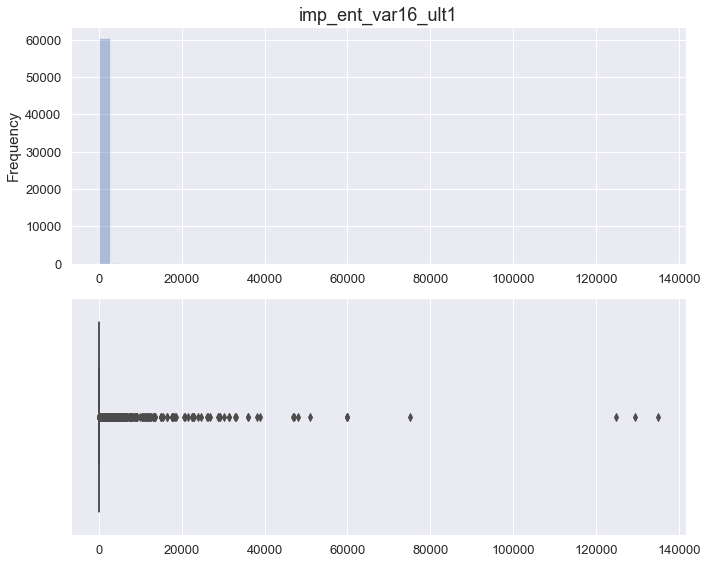

In [92]:
# Plots: Histrograma e BoxPlot
ptlib.plot_hist_boxplot_feature(df=train_df, feature='imp_ent_var16_ult1', bins=None, kde=False,
                                orient_boxplot='h', plot_style="darkgrid", cols_nr=1, rows_nr=2,
                                titles=['imp_ent_var16_ult1', None],titles_fontsize=18,
                                ylabels=['Frequency', None], ylabels_fontsize=15, colors='b', saturation_boxplot=0.80,
                                xtick_labelsize=13, ytick_labelsize=13, width=10, height=8, wspace=None, hspace=None,
                                figure_id="plot_hist_boxplot_imp_ent_var16_ult1", figure_path=PROJECT_IMG_PATH,
                                figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                               )

**Análise:** Temos uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores a partir de `60 mil`**.Também podemos observar que a sua distribuição de frequência está concentrada em valores iguais a **`0`** (**`95%`** dos valores), conforme podemos observar no *histograma* e no relatório de *percentis*.

Saving figure: plot_hist_boxplot_imp_sal_var16_ult1


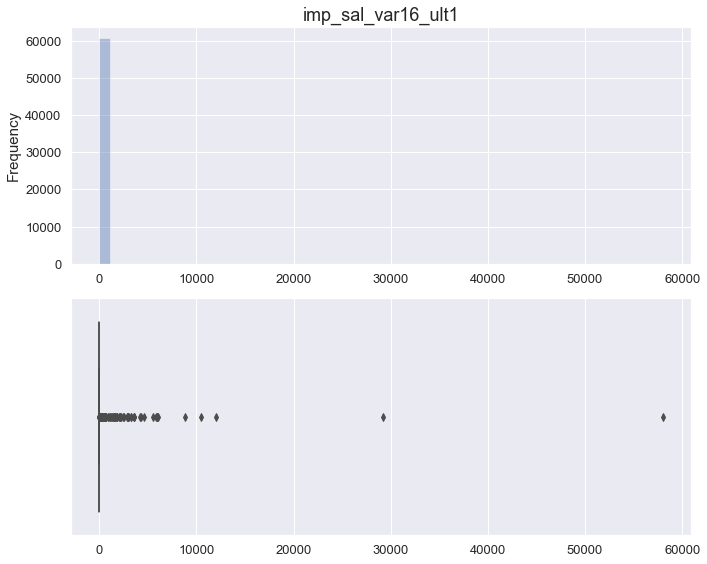

In [93]:
# Plots: Histrograma e BoxPlot
ptlib.plot_hist_boxplot_feature(df=train_df, feature='imp_sal_var16_ult1', bins=None, kde=False,
                                orient_boxplot='h', plot_style="darkgrid", cols_nr=1, rows_nr=2,
                                titles=['imp_sal_var16_ult1', None],titles_fontsize=18,
                                ylabels=['Frequency', None], ylabels_fontsize=15, colors='b', saturation_boxplot=0.80,
                                xtick_labelsize=13, ytick_labelsize=13, width=10, height=8, wspace=None, hspace=None,
                                figure_id="plot_hist_boxplot_imp_sal_var16_ult1", figure_path=PROJECT_IMG_PATH,
                                figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                               )

**Análise:** Temos uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores a partir de `10 mil`**.Também podemos observar que a sua distribuição de frequência está concentrada em valores iguais a **`0`** (**`99%`** dos valores), conforme podemos observar no *histograma* e no relatório de *percentis*.

**Conclusão:** observamos que para as **04 features** de **var16** a grande maioria dos valores (**acima de 95%**) são constantes e iguais a **`0`**. Portanto, entendemos que estas **features não são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [94]:
# Armazenando informações sobre as features:
features = ['num_ent_var16_ult1', 'num_sal_var16_ult1']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['imp_ent_var16_ult1', 'imp_sal_var16_ult1']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var16']) # Irrelevantes.

In [95]:
# Verificando a contagem de features analisadas até aqui:
print("Counting of analyzed features: {}".format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                 'Discrete', 'Continuous'])))

Counting of analyzed features: 20


## 03- Salvando informações (`objetos`) importantes, encontradas nesta etapa:

Agora, vamos salvar os seguintes `objetos` importantes, que serão utilizados nas próximas etapas, a saber:

1. **`feat_groupby_vars`:** dicionário com as features agrupadas por tipo de variável (var1, var2, var18, etc...);

2. **`vars_groupby_featcount`:** dicionário com as variáveis (var1, var2, var18, etc...) agrupadas por quantidade (contagem) de features (Feat_1, Feat_2, Feat_3, etc...);

3. **`santander_feat_info`:** dicionário com as principais informações sobre cada uma das features, ou seja, `tipo de variável`, valores ausentes (`NaN`), valores extremos (`Outliers`) e uma lista das variáveis que não são importantes para a criação dos modelos preditivos (`Drop`).

In [96]:
# Salvando o objeto "feat_groupby_vars":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="feat_groupby_vars.pickle", object_name=feat_groupby_vars,
                          msg="The 'feat_groupby_vars' object has been successfully saved!")

# Salvando o objeto "vars_groupby_featcount":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="vars_groupby_featcount.pickle", object_name=vars_groupby_featcount,
                          msg="The 'vars_groupby_featcount' object has been successfully saved!")

# Salvando o objeto "santander_feat_info":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="santander_feat_info.pickle", object_name=santander_feat_info,
                          msg="The 'santander_feat_info' object has been successfully saved!")

The 'feat_groupby_vars' object has been successfully saved!
The 'vars_groupby_featcount' object has been successfully saved!
The 'santander_feat_info' object has been successfully saved!


## <font color='black'>FIM</font>